In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/danielgrijalvas/movies'
od.download(dataset_url)
     

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadhusban
Your Kaggle Key: ··········


100%|██████████| 424k/424k [00:00<00:00, 28.9MB/s]

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


In [3]:
import nltk
import string
import re
import pandas as pd

In [4]:
df = pd.read_csv("/content/movies/movies.csv")

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
data = df.drop(columns = ['name',"rating","year","released","score","votes","writer","star","country","budget","gross","company","runtime"],axis =1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genre     7668 non-null   object
 1   director  7668 non-null   object
dtypes: object(2)
memory usage: 119.9+ KB


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.preprocessing import LabelEncoder


# Preprocessing
# You can add more preprocessing steps based on your specific dataset
data['director'] = data['director'].str.lower()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['director'])
sequences = tokenizer.texts_to_sequences(data['director'])
word_index = tokenizer.word_index
max_sequence_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='post')

## Create dummy variables for each label
genres = pd.get_dummies(data['genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, genres, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Embedding(len(word_index) + 1, 128, input_length=max_sequence_len),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(genres.columns), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Epoch 1/25
192/192 [==============================] - 8s 19ms/step - loss: 0.2407 - accuracy: 0.2167 - val_loss: 0.1492 - val_accuracy: 0.2888
Epoch 2/25
192/192 [==============================] - 5s 26ms/step - loss: 0.1494 - accuracy: 0.2819 - val_loss: 0.1481 - val_accuracy: 0.2894
Epoch 3/25
192/192 [==============================] - 5s 27ms/step - loss: 0.1438 - accuracy: 0.3300 - val_loss: 0.1468 - val_accuracy: 0.3168
Epoch 4/25
192/192 [==============================] - 4s 23ms/step - loss: 0.1366 - accuracy: 0.3857 - val_loss: 0.1466 - val_accuracy: 0.3383
Epoch 5/25
192/192 [==============================] - 5s 26ms/step - loss: 0.1309 - accuracy: 0.4320 - val_loss: 0.1461 - val_accuracy: 0.3735
Epoch 6/25
192/192 [==============================] - 5s 26ms/step - loss: 0.1231 - accuracy: 0.4850 - val_loss: 0.1452 - val_accuracy: 0.3977
Epoch 7/25
192/192 [==============================] - 5s 27ms/step - loss: 0.1152 - accuracy: 0.5370 - val_loss: 0.1450 - val_accuracy: 0.4094

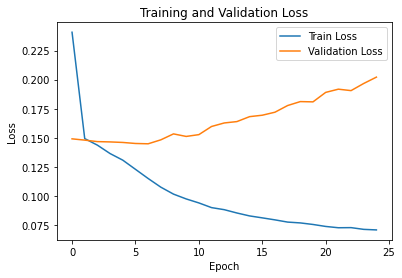

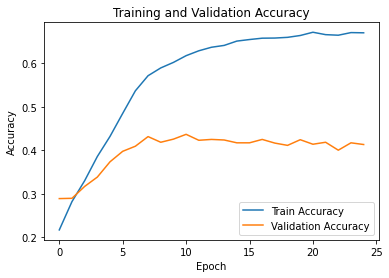

In [14]:
# Plot loss and accuracy curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
# Get actor name for prediction
director_name = '	James Cameron'

# Create a sequence for the actor name
director_seq = tokenizer.texts_to_sequences([director_name])
director_padded_seq = pad_sequences(director_seq, maxlen=max_sequence_len, padding='post')

# Predict the genre for the actor name
predicted_genres = model.predict(director_padded_seq)
predicted_genres = predicted_genres[0]

# Get the actual genre names
genre_names = genres.columns

# Create a dictionary with genre names and their probabilities
genre_probs = {}
for i in range(len(genre_names)):
    genre_probs[genre_names[i]] = predicted_genres[i]

# Print the predicted genres and their probabilities
print('Predicted genres for {}:'.format(director_name))
for genre, prob in genre_probs.items():
    if prob > 0.5:  # Only consider genres with probability greater than 0.5
        print('{}: {}'.format(genre, prob))

1/1 [==============================] - 0s 27ms/step
Predicted genres for 	James Cameron:
Action: 0.6173761487007141


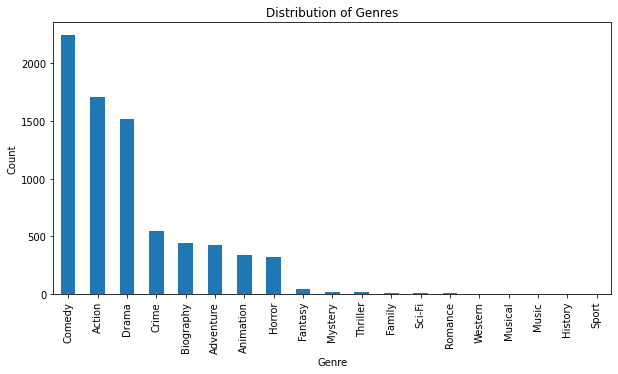

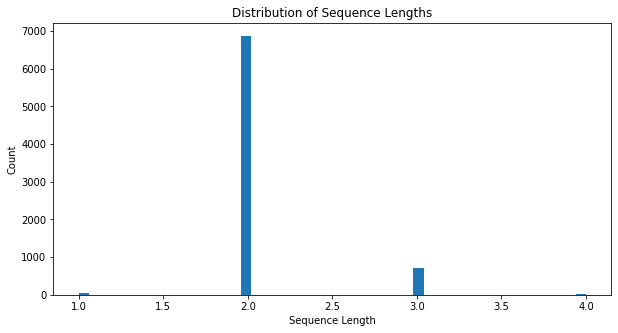

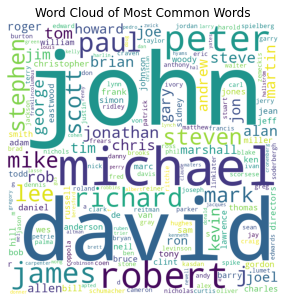

In [16]:
import matplotlib.pyplot as plt

# Plot distribution of genres
plt.figure(figsize=(10,5))
data['genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Plot distribution of sequence lengths
plt.figure(figsize=(10,5))
plt.hist([len(seq) for seq in sequences], bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.show()

# Plot word cloud of most common words
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate_from_frequencies(tokenizer.word_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Word Cloud of Most Common Words')
plt.axis('off')
plt.show()


In [10]:
# model.save("my_director.h5")

In [11]:
# plot_model(model, show_shapes=True)


In [12]:
# model.summary()